In [1]:
# Evaluaciones de peliculas
#             Pelicula 1  |  Pelicula 2 | Pelicula 3
# Cliente 1 |      0      |     0       |     2
# Cliente 2 |      3      |     0       |     0
# Cliente 3 |      0      |     5       |     0
# Cliente 4 |      0      |     0       |     0

# Peliculas_Cliente.txt  (id_pelicula  id_cliente   evaluacion)
# 2  3  5
# 3  1  2
# 1  2  3

In [2]:
import numpy as np
import pandas
from sklearn.manifold import MDS 
import matplotlib.pyplot as plt

In [3]:
nClientes = 943
nPeliculas = 1682
E = np.zeros((nClientes,nPeliculas) )

file = open('peliculas/Peliculas_Clientes.txt','r')
for line in file:
    id_cliente, id_pelicula, evaluacion, _ = line.split('\t')
    E[int(id_cliente)-1,int(id_pelicula)-1] = evaluacion
print(E)
df = pandas.DataFrame(E,index=np.arange(1,nClientes+1),columns=np.arange(1,nPeliculas+1))
df.to_csv('evaluaciones_peliculas.csv')

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [4]:
peliculas = []
file = open('peliculas/Peliculas_descripcion.txt','r')
for line in file:
    arr = line.split('|')
    id_pelicula, titulo = arr[0], arr[1]
    peliculas.append( titulo )
#print(len(peliculas),peliculas)

### Filtrar: conservar sólo las N peliculas con mayor número de evaluaciones

In [5]:
N = 100

print('Evaluaciones:',E.shape)
print(E)
# Calcular el número de evaluaciones por película
n_evaluaciones_pelicula = np.zeros((nPeliculas))
for p in range(nPeliculas):
    n_evaluaciones_pelicula[p] = np.sum(  E[:,p]!=0  )
    
# Ordenar de la que tiene mayor número de evaluaciones a la menor
idx = np.argsort(n_evaluaciones_pelicula)
idx = idx[::-1]
peliculas = np.array(peliculas)[idx]
n_evaluaciones_pelicula = n_evaluaciones_pelicula[idx]

idx = idx[:N]
peliculas = peliculas[:N]
n_evaluaciones_pelicula = n_evaluaciones_pelicula[:N]

for i in range(len(idx)):
    print( peliculas[i],n_evaluaciones_pelicula[i])


Evaluaciones: (943, 1682)
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Star Wars (1977) 583.0
Contact (1997) 509.0
Fargo (1996) 508.0
Return of the Jedi (1983) 507.0
Liar Liar (1997) 485.0
English Patient, The (1996) 481.0
Scream (1996) 478.0
Toy Story (1995) 452.0
Air Force One (1997) 431.0
Independence Day (ID4) (1996) 429.0
Raiders of the Lost Ark (1981) 420.0
Godfather, The (1972) 413.0
Pulp Fiction (1994) 394.0
Twelve Monkeys (1995) 392.0
Silence of the Lambs, The (1991) 390.0
Jerry Maguire (1996) 384.0
Rock, The (1996) 378.0
Empire Strikes Back, The (1980) 367.0
Star Trek: First Contact (1996) 365.0
Titanic (1997) 350.0
Back to the Future (1985) 350.0
Mission: Impossible (1996) 344.0
Fugitive, The (1993) 336.0
Indiana Jones and the Last Crusade (1989) 331.0
Willy Wonka and the Chocolate Factory (1971) 326.0
Princess Bride, The (1987) 324.0
Forrest Gump (1994) 321.0
Monty

In [6]:
E = E[:,idx]
df = pandas.DataFrame(E,index=np.arange(1,nClientes+1),columns=peliculas)
df.to_csv('evaluaciones_peliculas.csv')

## Representación 1: con matriz de distancias

In [12]:
D = np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        peli = E[:,i]
        pelj = E[:,j]
        idx = np.logical_and( peli!=0, pelj!=0 )
        peli = peli[idx]
        pelj = pelj[idx]
        D[i,j] = D[j,i] = np.mean(np.abs( peli-pelj ))
print(D)

[[0.         1.0239521  0.9035533  ... 0.80110497 1.80851064 1.53389831]
 [1.0239521  0.         1.02573529 ... 0.96330275 1.3803681  1.16447368]
 [0.9035533  1.02573529 0.         ... 0.73856209 1.856      1.57627119]
 ...
 [0.80110497 0.96330275 0.73856209 ... 0.         1.91666667 1.68421053]
 [1.80851064 1.3803681  1.856      ... 1.91666667 0.         0.82075472]
 [1.53389831 1.16447368 1.57627119 ... 1.68421053 0.82075472 0.        ]]


In [13]:
model = MDS(dissimilarity='precomputed')
X = model.fit_transform(D)
print('X',X.shape)

X (100, 2)


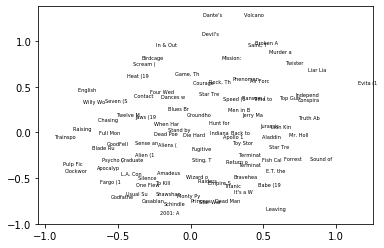

In [14]:

plt.figure()
plt.plot(X[:,0],X[:,1],'.',color='white')
for i in range(N):
    plt.text(X[i,0],X[i,1],peliculas[i][:8],fontsize=5)
plt.savefig('peliculas.png',dpi=300)

## Representación 2: con los datos de las evaluaciones

E (943, 100)
X (100, 943)
X (100, 2)


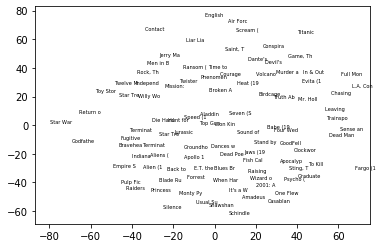

In [10]:
print('E',E.shape)
X = E.transpose()
print('X',X.shape)

model = MDS(dissimilarity='euclidean')
X = model.fit_transform(X)
print('X',X.shape)

plt.figure()
plt.plot(X[:,0],X[:,1],'.',color='white')
for i in range(N):
    plt.text(X[i,0],X[i,1],peliculas[i][:8],fontsize=5)
#plt.savefig('peliculas.png',dpi=300)

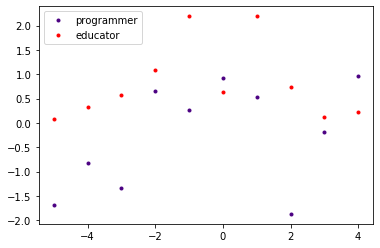

In [11]:
# Más colores: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colores = ['blue','red','orange']
profesiones = ['programmer','educator']

x = np.arange(-5,5)
y1 = np.random.uniform(-2,1,len(x))
y2 = np.random.uniform(0,3,len(x))
plt.plot(x,y1,'.',color='indigo',label='programmer')
plt.plot(x,y2,'.',color='red',label='educator')
plt.legend()
plt.show()